In [70]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchaudio
from hybra.utils import random_filterbank, fir_tightener3000, kappa_alias
from hybra import HybrA

In [66]:
encoder = HybrA(path_to_auditory_filter_config="filters/audlet.pth", start_tight=True)

In [68]:
# load wav file

waveform, sample_rate = torchaudio.load("audio/signal.wav")

UnpicklingError: unpickling stack underflow

In [58]:
N = 20
T = 10
J = 1
D = 1

w = random_filterbank(N, J, T)
w_tight = fir_tightener3000(w, T, D, eps=1.01).real
w, w_tight

(tensor([[-0.0062,  0.5302,  0.0683,  0.4124,  0.0624, -0.5657, -0.0395,  0.1386,
          -0.1445,  0.0915,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
           0.0000,  0.0000,  0.0000,  0.0000]]),
 tensor([[-9.3148e-04,  2.2264e-01, -2.3128e-03,  9.5041e-01,  3.8040e-03,
          -2.1164e-01, -6.4778e-04,  4.7134e-02,  9.9918e-05, -1.0498e-02,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
           0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00]]))

In [59]:
# zero padding w_tight to length 50
#w_tight = torch.cat([w_tight, torch.zeros(J, 500-w_tight.shape[1])], dim=1)
#print(w_tight.shape)
kappa_alias(w, D, aliasing=False), kappa_alias(w_tight, D, aliasing=False)

(tensor(11.5560), tensor(1.0100))

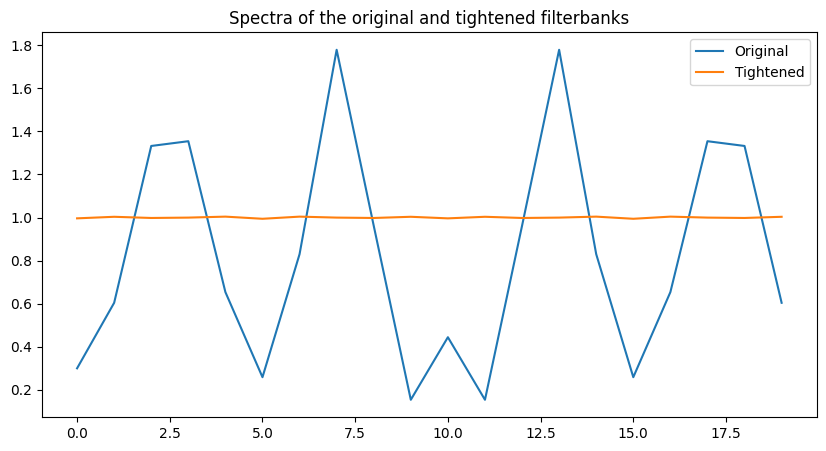

In [60]:
# plot spectra
w_hat = torch.sum(torch.fft.fft(w.T, dim=0).abs()**2, dim=1)
w_tight_hat = torch.sum(torch.fft.fft(w_tight.T, dim=0).abs()**2, dim=1)
plt.figure(figsize=(10,5))
plt.plot(w_hat.abs().numpy())
plt.plot(w_tight_hat.abs().numpy())
plt.legend(["Original", "Tightened"])
plt.title("Spectra of the original and tightened filterbanks")
plt.show()

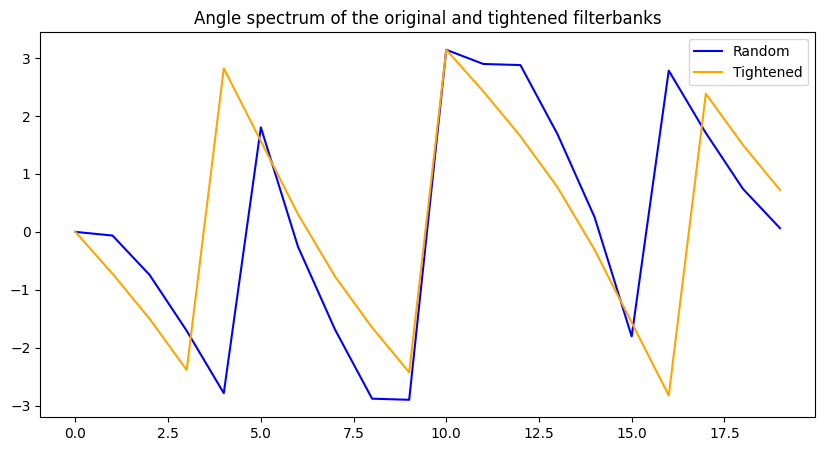

In [62]:
# plot angle spectrum
w_hat = torch.fft.fft(w.T, dim=0)
w_tight_hat = torch.fft.fft(w_tight.T, dim=0)
plt.figure(figsize=(10,5))
plt.plot(torch.angle(w_hat).numpy(), color="blue")
plt.plot(torch.angle(w_tight_hat).numpy(), color="orange")
plt.legend(["Random", "Tightened"])
plt.title("Angle spectrum of the original and tightened filterbanks")
plt.show()